In [ ]:
!nvidia-smi

Fri Jan 17 06:16:53 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import yaml

# Paths to the dataset splits
train_images_path = '/content/drive/MyDrive/yolov11/dataset/sam_dataset/images/train'
val_images_path = '/content/drive/MyDrive/yolov11/dataset/sam_dataset/images/val'
test_images_path = '/content/drive/MyDrive/yolov11/dataset/sam_dataset/images/test'

# Define the names of your classes (adjust this list based on your dataset)
class_names = ['fish_larvae']  # Update if you have more than one class

# YAML content
data_yaml = {
    'train': train_images_path,
    'val': val_images_path,
    'test': test_images_path,
    'nc': len(class_names),  # Number of classes
    'names': class_names     # Class names
}

# Output path for the YAML file
output_yaml_path = '/content/drive/MyDrive/yolov11/dataset/sam_dataset/data.yaml'

# Write the YAML file
with open(output_yaml_path, 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

print(f"YAML file created at {output_yaml_path}")

YAML file created at /content/drive/MyDrive/yolov11/dataset/sam_dataset/data.yaml


In [ ]:
!pip install opencv-python ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.1/910.1 kB 15.9 MB/s eta 0:00:00


In [ ]:
import cv2
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11n.pt")

results = model.train(
    data="/content/drive/MyDrive/yolov11/dataset/sam_dataset/data.yaml",
    epochs=100,
    imgsz=640,
    project="/content/drive/MyDrive/yolov11/runs/",
    name="experiment_sam"  # Change name for each dataset experiment
)


100%|██████████| 5.35M/5.35M [00:00<00:00, 16.4MB/s]


Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/yolov11/dataset/sam_dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov11/runs/, name=experiment_sam4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, s

100%|██████████| 755k/755k [00:00<00:00, 3.07MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/yolov11/dataset/sam_dataset/labels/train.cache... 2021 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2021/2021 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/yolov11/dataset/sam_dataset/labels/val.cache... 578 images, 0 backgrounds, 0 corrupt: 100%|██████████| 578/578 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolov11/runs/experiment_sam4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/yolov11/runs/experiment_sam4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       2.5G      1.026      1.498     0.9403         24        640: 100%|██████████| 127/127 [00:59<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:50<00:00,  2.68s/it]


                   all        578       1784      0.957      0.918      0.961      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.44G     0.9644     0.9036     0.9249          7        640: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.77it/s]

                   all        578       1784      0.927      0.902      0.945      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.44G     0.9645     0.7704     0.9279         23        640: 100%|██████████| 127/127 [00:21<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.91it/s]

                   all        578       1784      0.923      0.897      0.954      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.44G     0.9386     0.6721     0.9192         30        640: 100%|██████████| 127/127 [00:21<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.08it/s]

                   all        578       1784      0.959      0.921      0.965      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.45G     0.8955     0.6021     0.9113         15        640: 100%|██████████| 127/127 [00:20<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.20it/s]

                   all        578       1784       0.96      0.954      0.976       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.44G     0.8929     0.5751     0.9086         21        640: 100%|██████████| 127/127 [00:21<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.99it/s]

                   all        578       1784      0.958      0.961      0.976      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.44G     0.8578     0.5439     0.8956         35        640: 100%|██████████| 127/127 [00:21<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.25it/s]

                   all        578       1784       0.94      0.961       0.97       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.45G     0.8444     0.5334     0.9007         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.02it/s]

                   all        578       1784      0.942      0.949      0.967      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.45G     0.8386     0.5272     0.8977         18        640: 100%|██████████| 127/127 [00:20<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.14it/s]

                   all        578       1784      0.963      0.943      0.976      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.45G     0.8235     0.5146     0.8929         16        640: 100%|██████████| 127/127 [00:20<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.05it/s]

                   all        578       1784      0.965      0.965      0.978      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.44G     0.8082     0.4972     0.8898         13        640: 100%|██████████| 127/127 [00:20<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.30it/s]

                   all        578       1784      0.957      0.953      0.972      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.45G     0.7989     0.4903     0.8875         29        640: 100%|██████████| 127/127 [00:20<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.07it/s]

                   all        578       1784      0.955      0.963      0.977       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.43G     0.7938     0.4819     0.8858         22        640: 100%|██████████| 127/127 [00:20<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.29it/s]

                   all        578       1784      0.971      0.965      0.983      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.44G     0.7908     0.4723     0.8864         23        640: 100%|██████████| 127/127 [00:20<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.16it/s]

                   all        578       1784      0.963       0.96       0.98      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.43G     0.7901     0.4764     0.8892         11        640: 100%|██████████| 127/127 [00:20<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        578       1784      0.969      0.958       0.98      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.44G     0.7879     0.4767     0.8862         27        640: 100%|██████████| 127/127 [00:21<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.10it/s]

                   all        578       1784      0.967      0.974      0.982      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.44G     0.7694     0.4589     0.8798         30        640: 100%|██████████| 127/127 [00:20<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.22it/s]

                   all        578       1784      0.968       0.97      0.977      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.45G     0.7562     0.4514     0.8794         26        640: 100%|██████████| 127/127 [00:21<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.31it/s]

                   all        578       1784      0.968      0.962      0.981      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.44G     0.7323     0.4381      0.873         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.19it/s]

                   all        578       1784      0.969      0.967      0.982      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.47G     0.7428     0.4395     0.8749         11        640: 100%|██████████| 127/127 [00:21<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.26it/s]

                   all        578       1784      0.978      0.967      0.983      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.42G     0.7511     0.4437     0.8777         35        640: 100%|██████████| 127/127 [00:20<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.96it/s]

                   all        578       1784      0.976      0.965      0.981      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.45G     0.7331     0.4336     0.8733         24        640: 100%|██████████| 127/127 [00:21<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.20it/s]

                   all        578       1784      0.969      0.972      0.984      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.44G     0.7231     0.4279     0.8705         18        640: 100%|██████████| 127/127 [00:20<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.98it/s]

                   all        578       1784      0.971      0.968      0.983      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.44G     0.7313     0.4347     0.8694         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.14it/s]

                   all        578       1784       0.97      0.974      0.983      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.45G     0.7199     0.4237     0.8696         21        640: 100%|██████████| 127/127 [00:21<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.93it/s]

                   all        578       1784      0.966      0.968      0.983      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.45G     0.7145     0.4162     0.8685         20        640: 100%|██████████| 127/127 [00:21<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.28it/s]

                   all        578       1784      0.977      0.967      0.983      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.44G     0.7224     0.4221     0.8708         24        640: 100%|██████████| 127/127 [00:21<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.01it/s]

                   all        578       1784      0.975      0.967      0.983      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.45G     0.7093     0.4152     0.8673         22        640: 100%|██████████| 127/127 [00:20<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.29it/s]

                   all        578       1784      0.976      0.967      0.983      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.44G     0.7204     0.4189     0.8699         32        640: 100%|██████████| 127/127 [00:20<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.02it/s]

                   all        578       1784      0.973      0.979      0.982      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.45G     0.7147     0.4103     0.8694         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.20it/s]

                   all        578       1784      0.982      0.967      0.984      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.43G     0.7022     0.4069     0.8644         35        640: 100%|██████████| 127/127 [00:20<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.07it/s]

                   all        578       1784      0.977      0.973      0.986      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.44G     0.7084     0.4071      0.864         20        640: 100%|██████████| 127/127 [00:20<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.31it/s]

                   all        578       1784      0.974      0.975      0.985      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.44G     0.7041     0.3991     0.8671         26        640: 100%|██████████| 127/127 [00:20<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.05it/s]

                   all        578       1784      0.972      0.971      0.983      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.45G     0.6877     0.3946     0.8646         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.30it/s]

                   all        578       1784      0.981      0.977      0.986      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.43G     0.6877     0.3982     0.8564         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.10it/s]

                   all        578       1784      0.972       0.97      0.985      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.45G     0.6868     0.3966     0.8602         35        640: 100%|██████████| 127/127 [00:20<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.20it/s]

                   all        578       1784      0.974      0.971      0.982      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.45G      0.685     0.3965      0.865         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.27it/s]

                   all        578       1784       0.98      0.971      0.982      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.45G     0.6947     0.3978     0.8622         12        640: 100%|██████████| 127/127 [00:20<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.18it/s]

                   all        578       1784      0.978      0.973      0.984      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.44G     0.6639     0.3823     0.8535         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.31it/s]

                   all        578       1784      0.978      0.974      0.984      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.45G     0.6853     0.3895     0.8607         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.16it/s]

                   all        578       1784      0.979      0.969      0.984      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.47G     0.6796     0.3875     0.8596         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.29it/s]

                   all        578       1784      0.976      0.971      0.984      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.44G     0.6782     0.3885     0.8595         29        640: 100%|██████████| 127/127 [00:20<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.02it/s]

                   all        578       1784      0.975      0.975      0.981      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.43G     0.6786     0.3883     0.8571         30        640: 100%|██████████| 127/127 [00:20<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.19it/s]

                   all        578       1784      0.975      0.977      0.982      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.45G     0.6818     0.3821     0.8608         35        640: 100%|██████████| 127/127 [00:20<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.01it/s]

                   all        578       1784      0.979      0.973      0.985      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.44G     0.6706      0.381     0.8642         22        640: 100%|██████████| 127/127 [00:20<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.30it/s]

                   all        578       1784      0.976      0.973      0.987       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.44G     0.6614     0.3788     0.8534         17        640: 100%|██████████| 127/127 [00:20<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.02it/s]

                   all        578       1784      0.954      0.889      0.937      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.43G     0.6638     0.3751     0.8526         28        640: 100%|██████████| 127/127 [00:20<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.93it/s]

                   all        578       1784       0.96      0.936      0.957      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.44G     0.7157     0.3984     0.8679         33        640: 100%|██████████| 127/127 [00:21<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.93it/s]

                   all        578       1784      0.923      0.721      0.824      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.45G     0.7083     0.3987     0.8641         25        640: 100%|██████████| 127/127 [00:20<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.10it/s]

                   all        578       1784      0.967      0.904      0.966      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.47G     0.7065     0.3992     0.8683         29        640: 100%|██████████| 127/127 [00:20<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.14it/s]

                   all        578       1784      0.855      0.785      0.839      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.43G     0.7154     0.4038     0.8665         29        640: 100%|██████████| 127/127 [00:20<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.27it/s]

                   all        578       1784     0.0219    0.00504   0.000555   0.000182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.44G     0.7169     0.4096     0.8716         33        640: 100%|██████████| 127/127 [00:20<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.24it/s]

                   all        578       1784      0.135      0.137     0.0438     0.0178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.44G     0.7275     0.4144     0.8722         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.22it/s]

                   all        578       1784     0.0741      0.065     0.0184     0.0077



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.47G     0.7066     0.4039     0.8665         20        640: 100%|██████████| 127/127 [00:20<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.25it/s]

                   all        578       1784     0.0248     0.0224    0.00553     0.0014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.44G     0.7001      0.406      0.866         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.59it/s]

                   all        578       1784      0.495      0.294      0.253      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.45G     0.7144      0.406     0.8711         32        640: 100%|██████████| 127/127 [00:21<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.09it/s]

                   all        578       1784     0.0104    0.00729    0.00159   0.000558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.45G     0.7244     0.4094     0.8708         31        640: 100%|██████████| 127/127 [00:20<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.02it/s]

                   all        578       1784      0.171       0.31      0.118     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.45G     0.7161     0.4087      0.867         11        640: 100%|██████████| 127/127 [00:20<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  3.97it/s]

                   all        578       1784      0.166      0.316     0.0921     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.45G     0.7111     0.4081     0.8649         20        640: 100%|██████████| 127/127 [00:20<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.34it/s]

                   all        578       1784      0.327       0.27      0.242      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.47G     0.7018     0.4035     0.8662         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.98it/s]

                   all        578       1784      0.943      0.937      0.964      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.45G     0.7067     0.4119     0.8709         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.10it/s]

                   all        578       1784      0.852      0.663        0.7      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.45G     0.7023     0.4041     0.8704         17        640: 100%|██████████| 127/127 [00:20<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.53it/s]

                   all        578       1784      0.893      0.884       0.92      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.45G     0.6843     0.3977     0.8605         11        640: 100%|██████████| 127/127 [00:20<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.03it/s]

                   all        578       1784      0.728      0.361      0.392      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.47G      0.698     0.4043     0.8661         22        640: 100%|██████████| 127/127 [00:20<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.75it/s]

                   all        578       1784      0.655      0.274      0.308      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.45G     0.6924     0.4005     0.8595         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.42it/s]

                   all        578       1784      0.655      0.274      0.308      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.46G     0.7037      0.406     0.8676         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.19it/s]

                   all        578       1784      0.118    0.00953    0.00653    0.00178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.44G     0.6991     0.3983     0.8648         27        640: 100%|██████████| 127/127 [00:20<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.91it/s]

                   all        578       1784      0.652      0.534       0.53      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.45G     0.6848     0.3911     0.8604         28        640: 100%|██████████| 127/127 [00:20<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.03it/s]

                   all        578       1784      0.964      0.938      0.958      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.45G      0.686     0.3892     0.8584         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.89it/s]

                   all        578       1784      0.952      0.946      0.964      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.42G     0.6881     0.3926     0.8629         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]

                   all        578       1784      0.982      0.855      0.925      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.45G       0.68     0.3886     0.8617         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.92it/s]

                   all        578       1784      0.975      0.969       0.98      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.45G     0.6794     0.3899     0.8627         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.39it/s]

                   all        578       1784      0.901      0.885      0.921      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.45G     0.6749     0.3882     0.8617         27        640: 100%|██████████| 127/127 [00:20<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]

                   all        578       1784      0.937      0.871      0.914      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.45G     0.6811     0.3895     0.8621         11        640: 100%|██████████| 127/127 [00:20<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.73it/s]

                   all        578       1784      0.918      0.959       0.97      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.43G     0.6722     0.3859     0.8587         22        640: 100%|██████████| 127/127 [00:20<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.82it/s]

                   all        578       1784      0.975      0.972      0.979      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.45G      0.678     0.3849     0.8586         27        640: 100%|██████████| 127/127 [00:20<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.25it/s]

                   all        578       1784      0.969      0.948      0.973       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.45G     0.6624     0.3764     0.8574         32        640: 100%|██████████| 127/127 [00:20<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.01it/s]

                   all        578       1784      0.977      0.969      0.983      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.44G     0.6632     0.3753     0.8589         23        640: 100%|██████████| 127/127 [00:20<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.12it/s]

                   all        578       1784       0.98       0.97      0.981      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.43G     0.6621     0.3762     0.8567         23        640: 100%|██████████| 127/127 [00:20<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.18it/s]

                   all        578       1784       0.98      0.977      0.983      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.45G     0.6535     0.3712     0.8561         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.07it/s]

                   all        578       1784      0.973      0.975      0.983      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.45G     0.6565     0.3709     0.8542         18        640: 100%|██████████| 127/127 [00:20<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.23it/s]

                   all        578       1784      0.981      0.969      0.984      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.45G     0.6707     0.3742      0.858         15        640: 100%|██████████| 127/127 [00:20<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.04it/s]

                   all        578       1784      0.978      0.971      0.983      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.44G     0.6652      0.371     0.8573         12        640: 100%|██████████| 127/127 [00:20<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.16it/s]

                   all        578       1784      0.973      0.969      0.981      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.44G     0.6654     0.3748     0.8569         29        640: 100%|██████████| 127/127 [00:20<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.90it/s]

                   all        578       1784       0.98       0.97      0.983      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.45G     0.6461     0.3628     0.8519         20        640: 100%|██████████| 127/127 [00:20<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.20it/s]

                   all        578       1784      0.974      0.974      0.982      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.45G     0.6547     0.3667     0.8552         31        640: 100%|██████████| 127/127 [00:20<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.95it/s]

                   all        578       1784      0.977      0.967      0.981      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.43G     0.6405     0.3611     0.8564         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.16it/s]

                   all        578       1784       0.98      0.974      0.984      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.47G     0.6601     0.3662      0.855         23        640: 100%|██████████| 127/127 [00:20<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.93it/s]

                   all        578       1784      0.981      0.972      0.983       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.47G     0.6484     0.3626     0.8512         30        640: 100%|██████████| 127/127 [00:20<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.14it/s]

                   all        578       1784      0.986      0.969      0.983      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.45G     0.6485     0.3634      0.852         18        640: 100%|██████████| 127/127 [00:20<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.95it/s]

                   all        578       1784      0.981      0.975      0.984      0.833


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.42G      0.606     0.3402     0.8502         17        640: 100%|██████████| 127/127 [00:21<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.14it/s]

                   all        578       1784       0.98      0.971      0.983      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.42G     0.6015      0.334     0.8478         17        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.99it/s]

                   all        578       1784      0.983       0.97      0.984      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.42G     0.6004     0.3318     0.8476         12        640: 100%|██████████| 127/127 [00:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        578       1784      0.982      0.978      0.985      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.42G     0.6033     0.3295     0.8456         18        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.93it/s]

                   all        578       1784      0.984      0.975      0.984      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.41G     0.6005     0.3308     0.8461         13        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.22it/s]

                   all        578       1784      0.981      0.977      0.985      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.42G     0.5969      0.328     0.8454         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.00it/s]

                   all        578       1784      0.985      0.973      0.985      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.42G     0.5955     0.3248     0.8459         15        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.09it/s]

                   all        578       1784      0.981      0.976      0.985      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.42G     0.5905     0.3213     0.8465          9        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.87it/s]

                   all        578       1784      0.979      0.976      0.984      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.41G     0.5892     0.3202     0.8459         13        640: 100%|██████████| 127/127 [00:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.17it/s]

                   all        578       1784       0.98      0.979      0.985      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.42G     0.5916     0.3223     0.8436         16        640: 100%|██████████| 127/127 [00:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.94it/s]

                   all        578       1784      0.978      0.979      0.985      0.856



100 epochs completed in 0.734 hours.
Optimizer stripped from /content/drive/MyDrive/yolov11/runs/experiment_sam4/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/yolov11/runs/experiment_sam4/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/yolov11/runs/experiment_sam4/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.06it/s]


                   all        578       1784      0.979      0.976      0.984      0.859
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/drive/MyDrive/yolov11/runs/experiment_sam4


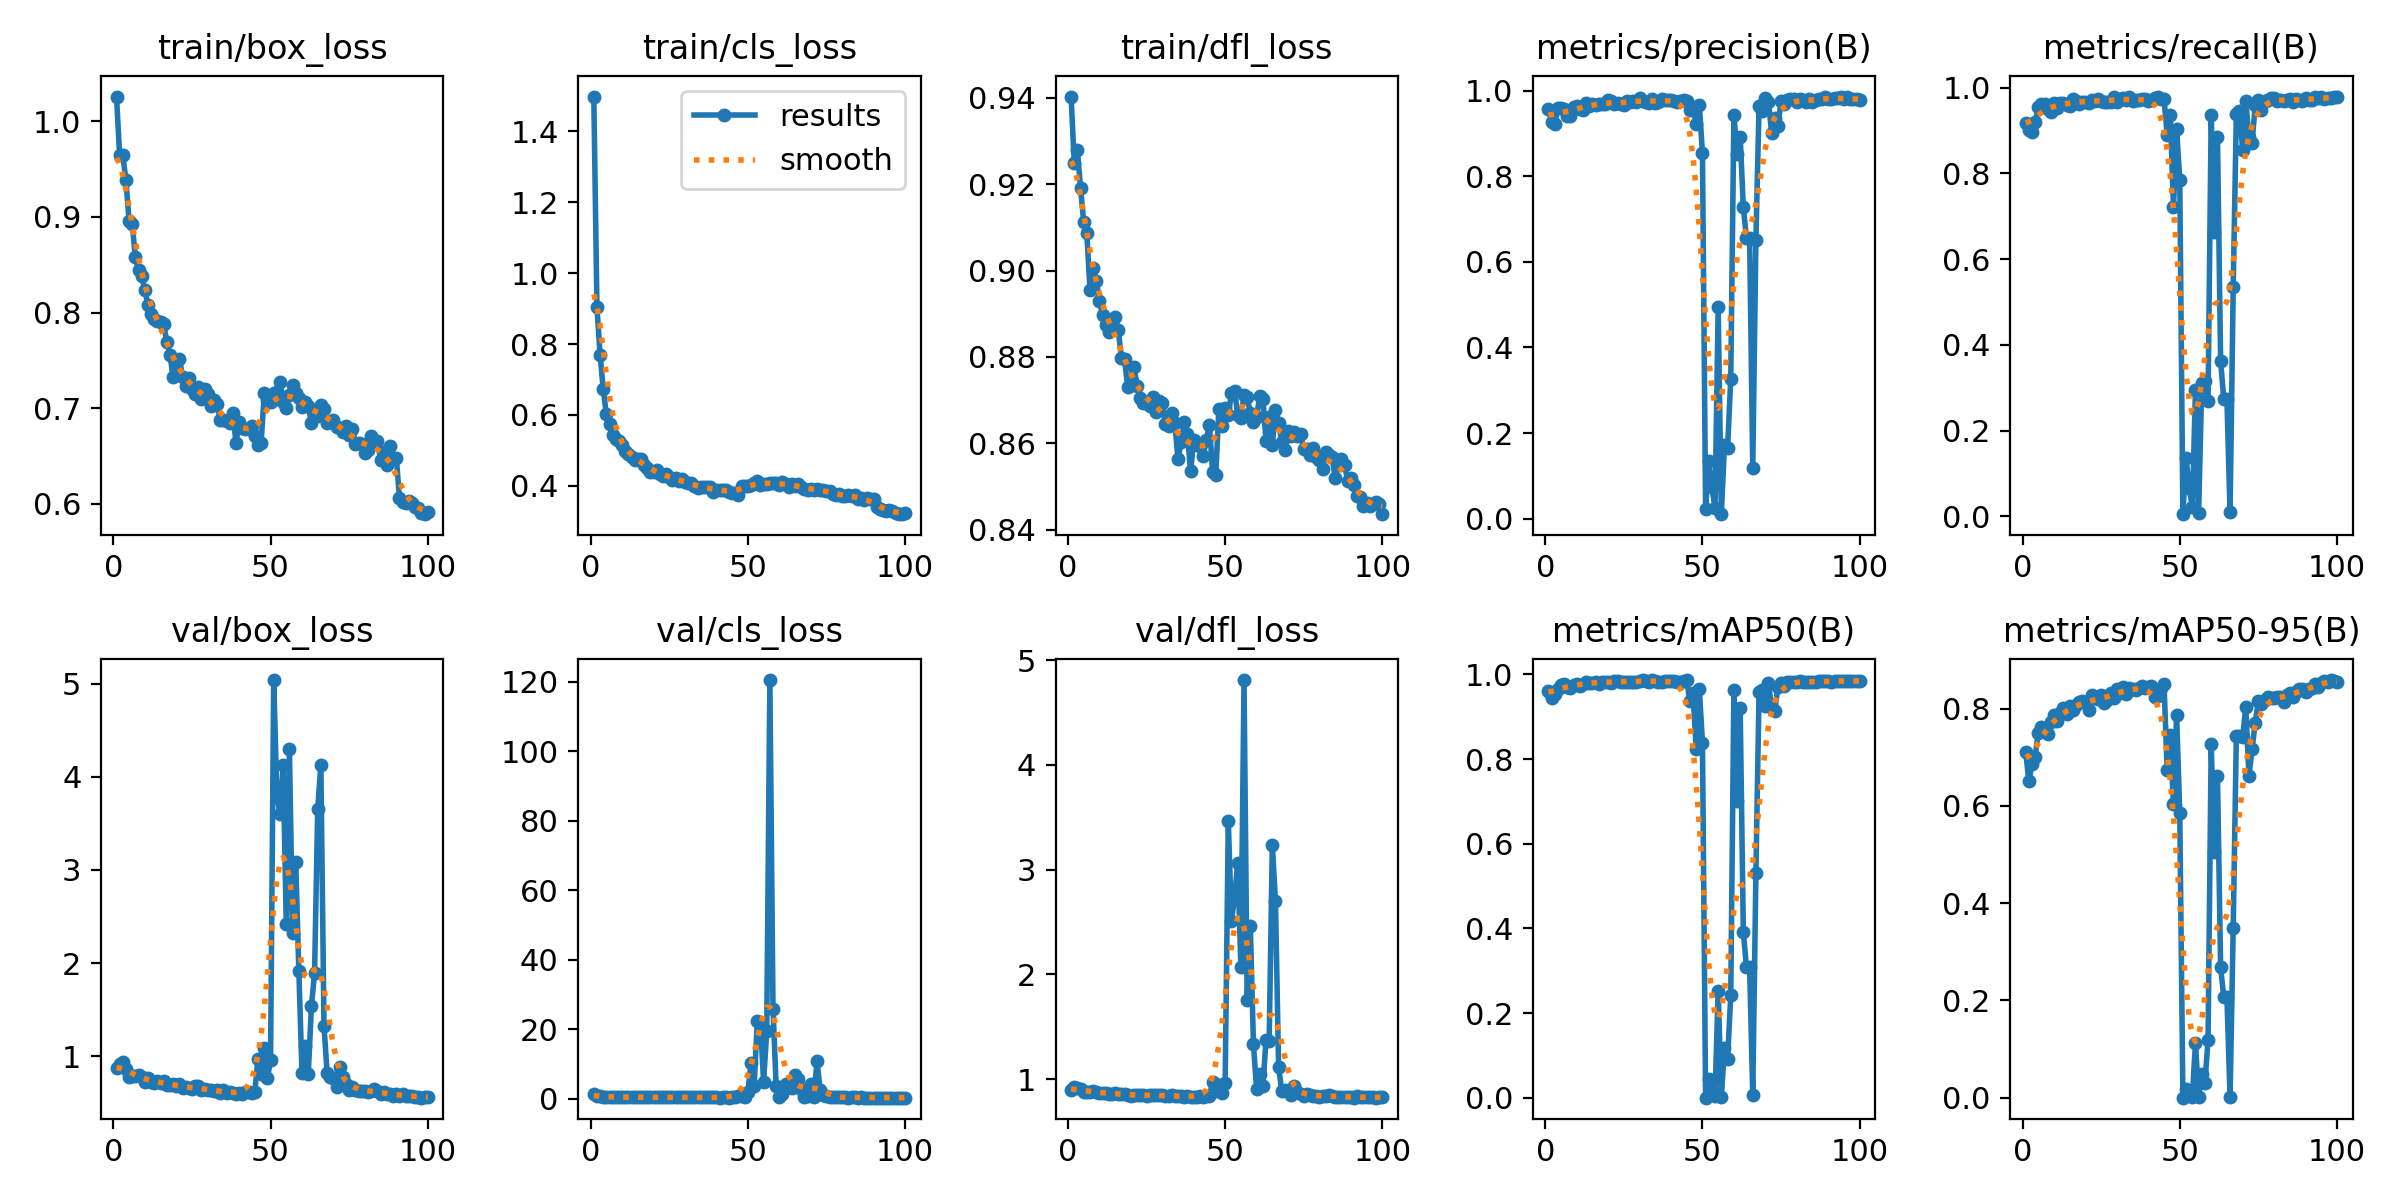

In [ ]:
from IPython.display import Image, display

# Display the results plot from the runs/detect/train directory
display(Image(filename="/content/drive/MyDrive/yolov11/runs/experiment_sam4/results.png"))


In [ ]:
import pandas as pd
import glob

# Locate the latest results CSV file in the detect or train directory
latest_exp = sorted(glob.glob("/content/drive/MyDrive/yolov11/runs/experiment_sam*"))[-1]
results_csv = f"{latest_exp}/results.csv"

# Load the CSV file
results_df = pd.read_csv(results_csv)

# Display the metrics available in the results.csv file
print("Available Metrics:\n", results_df.columns)
print(results_df.tail())  # Display metrics from the final epochs


Available Metrics:
 Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
    epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
95     96  2541.83         0.59690         0.32804         0.84537   
96     97  2566.86         0.59549         0.32483         0.84589   
97     98  2592.05         0.59049         0.32134         0.84646   
98     99  2617.00         0.58922         0.32023         0.84587   
99    100  2642.02         0.59156         0.32230         0.84358   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
95               0.98461            0.97253           0.98463   
96               0.98095            0.97646           0.98478   
97               0.97949            0.97590           0.98406   
98         

In [ ]:
# Display metrics for the final epoch
final_metrics = results_df.iloc[-1]  # Get the last row for the final epoch

print("Final Epoch Metrics:")
print(f"Precision: {final_metrics['metrics/precision(B)']}")
print(f"Recall: {final_metrics['metrics/recall(B)']}")
print(f"mAP@0.5: {final_metrics['metrics/mAP50(B)']}")
print(f"mAP@0.5:0.95: {final_metrics['metrics/mAP50-95(B)']}")



Final Epoch Metrics:
Precision: 0.97816
Recall: 0.97915
mAP@0.5: 0.98454
mAP@0.5:0.95: 0.85583


In [ ]:
import os
import json

# Load the trained model
model = YOLO("/content/drive/MyDrive/yolov11/runs/experiment_sam4/weights/best.pt")  # Replace with the path to your trained weights

# Define the path to your images directory
image_dir = "/content/drive/MyDrive/yolov11/dataset/sam_dataset/images/test"
pred_counts = {}  # Dictionary to store predicted counts

# Run inference on each image in the test folder
for image_file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_file)

    # Perform inference with YOLO model
    results = model(image_path)

    # Count detected objects (bounding boxes)
    num_boxes = len(results[0].boxes)

    # Save count with image name
    image_name = image_file.split('.')[0]
    pred_counts[image_name] = num_boxes

# Save predicted counts to a JSON file for comparison
output_file = '/content/drive/MyDrive/yolov11/dataset/sam_dataset/predicted_fish_counts.json'
with open(output_file, 'w') as json_file:
    json.dump(pred_counts, json_file)

print(f"Predicted fish counts saved to {output_file}")



image 1/1 /content/drive/MyDrive/yolov11/dataset/sam_dataset/images/test/05_img177.png: 640x640 1 fish_larvae, 9.4ms
Speed: 7.5ms preprocess, 9.4ms inference, 764.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov11/dataset/sam_dataset/images/test/06_img41.png: 640x640 1 fish_larvae, 9.5ms
Speed: 2.3ms preprocess, 9.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov11/dataset/sam_dataset/images/test/08_img645.png: 640x640 3 fish_larvaes, 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov11/dataset/sam_dataset/images/test/01_img19.png: 640x640 4 fish_larvaes, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov11/dataset/sam_dataset/images/test/05_img121.png: 640x640 1 fish_larvae, 10.2ms
Speed: 1.5ms preprocess

In [ ]:
# Example dictionary of true counts and predictions
true_counts = {
  "test/01_img19": 4, "test/01_img184": 3, "test/01_img143": 4, "test/01_img170": 3, "test/01_img114": 4, "test/01_img119": 4, "test/01_img190": 4, "test/01_img152": 4, "test/01_img179": 3, "test/01_img164": 4, "test/02_img206": 3, "test/03_img176": 5, "test/02_img155": 3, "test/02_img220": 3, "test/01_img49": 6, "test/03_img53": 5, "test/01_img67": 3, "test/03_img40": 7, "test/04_img04": 4, "test/01_img249": 4, "test/02_img23": 3, "test/03_img198": 5, "test/02_img213": 3, "test/03_img190": 5, "test/04_img28": 4, "test/01_img51": 4, "test/04_img25": 4, "test/03_img55": 6, "test/01_img239": 5, "test/02_img31": 3, "test/04_img23": 4, "test/01_img86": 4, "test/04_img116": 4, "test/03_img08": 6, "test/02_img42": 3, "test/02_img35": 3, "test/02_img13": 3, "test/03_img06": 6, "test/01_img92": 4, "test/03_img110": 5, "test/01_img32": 4, "test/03_img28": 4, "test/02_img62": 3, "test/03_img180": 5, "test/02_img79": 3, "test/01_img79": 4, "test/01_img253": 4, "test/03_img76": 5, "test/03_img47": 5, "test/02_img03": 3, "test/03_img122": 5, "test/01_img244": 4, "test/02_img121": 3, "test/02_img77": 3, "test/02_img85": 3, "test/02_img152": 3, "test/03_img30": 4, "test/02_img101": 3, "test/04_img19": 4, "test/02_img132": 3, "test/01_img31": 4, "test/03_img91": 5, "test/02_img122": 3, "test/03_img48": 5, "test/01_img40": 4, "test/01_img57": 4, "test/03_img156": 5, "test/04_img107": 4, "test/03_img75": 5, "test/03_img14": 5, "test/02_img159": 3, "test/03_img200": 5, "test/03_img186": 5, "test/03_img18": 6, "test/03_img60": 5, "test/03_img12": 5, "test/02_img165": 3, "test/02_img149": 3, "test/05_img68": 1, "test/05_img343": 1, "test/05_img183": 1, "test/05_img126": 1, "test/06_img124": 1, "test/06_img23": 1, "test/05_img330": 1, "test/05_img65": 1, "test/04_img29": 4, "test/04_img83": 4, "test/04_img62": 4, "test/05_img194": 1, "test/05_img263": 1, "test/07_img107": 4, "test/07_img07": 4, "test/07_img102": 4, "test/06_img118": 1, "test/05_img274": 1, "test/05_img347": 2, "test/06_img88": 1, "test/04_img31": 4, "test/05_img121": 1, "test/06_img80": 1, "test/05_img257": 1, "test/05_img292": 1, "test/06_img03": 1, "test/05_img11": 1, "test/06_img131": 1, "test/05_img164": 1, "test/06_img108": 1, "test/04_img50": 4, "test/06_img01": 1, "test/04_img85": 4, "test/06_img99": 1, "test/04_img51": 4, "test/06_img30": 1, "test/04_img52": 4, "test/06_img83": 1, "test/05_img357": 1, "test/05_img177": 1, "test/06_img137": 1, "test/05_img190": 1, "test/06_img52": 1, "test/05_img240": 1, "test/05_img101": 1, "test/06_img41": 1, "test/05_img354": 1, "test/05_img250": 1, "test/05_img299": 1, "test/05_img228": 1, "test/05_img239": 1, "test/05_img309": 1, "test/05_img356": 1, "test/05_img78": 1, "test/06_img14": 1, "test/05_img94": 1, "test/05_img320": 1, "test/05_img296": 1, "test/06_img119": 1, "test/05_img205": 1, "test/05_img323": 1, "test/05_img95": 1, "test/05_img340": 1, "test/05_img187": 1, "test/04_img66": 4, "test/04_img53": 4, "test/05_img93": 1, "test/05_img115": 1, "test/05_img160": 1, "test/05_img24": 1, "test/05_img05": 1, "test/07_img24": 4, "test/08_img608": 3, "test/08_img190": 3, "test/08_img402": 3, "test/07_img48": 4, "test/08_img364": 3, "test/08_img636": 3, "test/08_img118": 3, "test/08_img598": 3, "test/08_img270": 3, "test/08_img561": 3, "test/08_img486": 3, "test/08_img558": 3, "test/08_img213": 3, "test/08_img334": 3, "test/08_img135": 3, "test/08_img285": 3, "test/08_img571": 3, "test/07_img53": 4, "test/08_img591": 3, "test/08_img321": 3, "test/08_img50": 3, "test/08_img429": 3, "test/08_img547": 3, "test/08_img194": 3, "test/08_img14": 3, "test/08_img32": 3, "test/08_img342": 3, "test/07_img71": 4, "test/08_img147": 3, "test/07_img47": 4, "test/08_img551": 3, "test/08_img523": 3, "test/08_img191": 3, "test/08_img606": 3, "test/07_img62": 4, "test/08_img482": 3, "test/08_img418": 3, "test/07_img16": 4, "test/08_img148": 3, "test/07_img77": 4, "test/08_img176": 3, "test/08_img172": 3, "test/08_img193": 3, "test/08_img406": 3, "test/08_img01": 3, "test/07_img20": 4, "test/08_img180": 3, "test/08_img590": 3, "test/08_img374": 3, "test/08_img137": 3, "test/08_img268": 3, "test/07_img18": 4, "test/08_img51": 3, "test/07_img32": 4, "test/08_img149": 3, "test/08_img503": 3, "test/07_img69": 5, "test/08_img201": 3, "test/08_img385": 3, "test/08_img391": 3, "test/08_img365": 3, "test/08_img384": 3, "test/08_img122": 3, "test/08_img233": 3, "test/08_img531": 3, "test/08_img145": 3, "test/08_img573": 3, "test/08_img78": 3, "test/08_img645": 3, "test/09_img110": 3, "test/10_img11": 4, "test/08_img698": 3, "test/10_img387": 4, "test/10_img134": 3, "test/10_img137": 3, "test/10_img330": 4, "test/10_img214": 3, "test/08_img686": 3, "test/10_img310": 4, "test/10_img280": 4, "test/10_img276": 4, "test/09_img149": 3, "test/10_img185": 3, "test/10_img174": 3, "test/10_img113": 3, "test/10_img391": 4, "test/09_img81": 3, "test/10_img413": 4, "test/10_img43": 4, "test/08_img677": 4, "test/10_img191": 3, "test/10_img295": 4, "test/10_img207": 3, "test/09_img138": 4, "test/09_img10": 3, "test/10_img240": 4, "test/10_img396": 4, "test/10_img104": 3, "test/10_img151": 3, "test/09_img53": 3, "test/10_img182": 3, "test/10_img225": 4, "test/09_img25": 3, "test/10_img366": 4, "test/10_img267": 4, "test/10_img373": 4, "test/10_img378": 4, "test/10_img383": 4, "test/10_img29": 4, "test/09_img31": 3, "test/09_img44": 3, "test/10_img15": 4, "test/10_img103": 3, "test/10_img112": 3, "test/09_img26": 3, "test/09_img02": 3, "test/08_img683": 3, "test/08_img87": 3, "test/09_img163": 3, "test/10_img226": 4, "test/08_img647": 3, "test/08_img664": 3, "test/10_img426": 4, "test/09_img74": 3, "test/10_img398": 4, "test/09_img64": 3, "test/08_img690": 3, "test/10_img184": 3, "test/08_img710": 3, "test/10_img106": 3, "test/10_img304": 4, "test/10_img268": 4, "test/09_img17": 3, "test/10_img32": 4, "test/09_img107": 3, "test/08_img701": 3, "test/09_img77": 3, "test/10_img91": 3, "test/10_img45": 4
}
predictions ={"05_img177": 1, "06_img41": 1, "08_img645": 3, "01_img19": 4, "05_img121": 1, "08_img374": 3, "04_img116": 4, "03_img122": 5, "09_img10": 3, "04_img19": 4, "02_img220": 3, "08_img135": 3, "05_img194": 1, "02_img213": 3, "07_img71": 4, "08_img50": 3, "08_img561": 3, "04_img29": 4, "05_img65": 1, "09_img02": 3, "01_img67": 3, "08_img122": 3, "08_img590": 3, "08_img402": 3, "05_img205": 1, "05_img78": 1, "08_img321": 3, "05_img95": 1, "01_img179": 3, "08_img365": 3, "06_img01": 1, "07_img16": 4, "05_img11": 1, "08_img149": 3, "04_img107": 4, "02_img77": 3, "04_img53": 4, "03_img176": 5, "04_img23": 4, "03_img76": 5, "08_img683": 3, "06_img99": 1, "08_img647": 3, "06_img30": 1, "01_img119": 4, "03_img91": 5, "05_img115": 1, "06_img131": 1, "08_img503": 3, "08_img51": 3, "05_img183": 1, "04_img52": 4, "06_img03": 1, "01_img31": 4, "05_img263": 1, "08_img285": 3, "02_img132": 3, "03_img48": 5, "04_img25": 4, "01_img32": 4, "03_img110": 5, "06_img23": 1, "01_img253": 4, "04_img83": 5, "08_img608": 3, "05_img101": 1, "03_img12": 4, "05_img240": 1, "05_img323": 1, "08_img531": 3, "03_img40": 5, "03_img180": 5, "02_img62": 3, "08_img180": 3, "01_img86": 4, "04_img50": 5, "02_img42": 3, "08_img418": 3, "02_img121": 3, "03_img156": 5, "08_img87": 3, "05_img228": 1, "01_img152": 4, "01_img143": 4, "08_img342": 3, "01_img57": 4, "01_img249": 4, "01_img79": 4, "06_img119": 1, "08_img01": 3, "08_img482": 3, "06_img80": 1, "05_img160": 1, "05_img340": 1, "07_img24": 4, "05_img24": 1, "07_img102": 7, "08_img14": 3, "08_img551": 3, "07_img53": 4, "03_img190": 5, "07_img32": 4, "02_img03": 3, "04_img51": 4, "02_img165": 3, "03_img198": 5, "06_img14": 1, "05_img296": 1, "08_img334": 3, "01_img49": 4, "08_img194": 3, "08_img148": 3, "04_img85": 4, "08_img384": 3, "05_img05": 1, "03_img60": 5, "08_img710": 3, "08_img233": 3, "05_img257": 1, "07_img107": 5, "04_img66": 4, "07_img07": 4, "03_img53": 5, "08_img486": 3, "05_img93": 1, "08_img137": 3, "08_img191": 3, "02_img79": 3, "05_img356": 1, "02_img122": 3, "02_img159": 4, "05_img309": 1, "08_img364": 3, "01_img170": 3, "02_img155": 3, "05_img68": 1, "08_img636": 3, "06_img108": 1, "08_img523": 3, "05_img187": 1, "08_img172": 3, "02_img13": 3, "02_img206": 3, "08_img429": 3, "03_img200": 5, "06_img88": 1, "05_img320": 1, "06_img124": 1, "01_img114": 4, "03_img06": 4, "01_img190": 5, "08_img268": 3, "05_img343": 1, "07_img48": 5, "06_img137": 1, "04_img04": 4, "08_img391": 3, "08_img558": 3, "02_img31": 3, "05_img354": 1, "03_img47": 5, "01_img244": 4, "03_img75": 5, "08_img147": 3, "08_img598": 3, "06_img118": 1, "01_img184": 3, "02_img149": 3, "05_img164": 1, "05_img190": 1, "05_img299": 1, "05_img330": 1, "03_img30": 4, "05_img357": 1, "01_img164": 4, "08_img571": 3, "01_img40": 4, "08_img606": 3, "08_img32": 3, "07_img77": 5, "08_img686": 3, "05_img94": 1, "05_img347": 1, "05_img126": 1, "05_img274": 1, "03_img18": 5, "08_img78": 3, "04_img62": 4, "05_img292": 1, "08_img201": 3, "01_img239": 4, "08_img406": 3, "08_img573": 3, "07_img69": 4, "08_img385": 3, "08_img193": 3, "04_img28": 4, "03_img08": 5, "07_img20": 4, "03_img55": 5, "02_img23": 3, "08_img677": 3, "08_img145": 3, "08_img190": 3, "03_img28": 5, "08_img547": 3, "05_img239": 1, "08_img176": 3, "02_img152": 3, "02_img35": 3, "01_img92": 4, "08_img698": 3, "07_img18": 4, "05_img250": 1, "06_img83": 1, "03_img186": 4, "08_img701": 3, "08_img118": 3, "03_img14": 5, "07_img47": 4, "07_img62": 3, "02_img101": 4, "08_img213": 3, "08_img664": 3, "01_img51": 4, "06_img52": 1, "08_img690": 3, "02_img85": 3, "08_img591": 3, "08_img270": 3, "04_img31": 4, "10_img104": 3, "09_img26": 3, "10_img45": 4, "10_img112": 3, "10_img295": 4, "10_img137": 3, "10_img43": 4, "09_img44": 3, "10_img15": 4, "10_img214": 3, "09_img163": 3, "10_img330": 4, "10_img387": 4, "10_img378": 4, "09_img77": 2, "10_img174": 3, "10_img11": 4, "10_img91": 3, "10_img268": 4, "10_img426": 4, "10_img226": 4, "10_img134": 3, "09_img138": 3, "09_img81": 4, "10_img32": 4, "10_img191": 3, "09_img25": 3, "10_img366": 4, "09_img149": 3, "09_img31": 3, "10_img29": 4, "10_img310": 4, "10_img373": 4, "09_img53": 3, "10_img182": 3, "10_img304": 4, "10_img113": 3, "10_img207": 3, "09_img107": 3, "09_img110": 3, "10_img184": 3, "10_img225": 4, "10_img240": 4, "10_img280": 4, "10_img398": 4, "10_img396": 4, "10_img185": 3, "09_img64": 3, "10_img413": 4, "09_img74": 3, "10_img383": 4, "10_img276": 4, "10_img151": 3, "10_img391": 4, "10_img106": 3, "10_img267": 4, "10_img103": 3, "09_img17": 3}
total_images = len(true_counts)
total_absolute_error = 0
total_correct = 0  # Counter for correct predictions

# Iterate over each test image
for image_path, true_count in true_counts.items():
    image_name = image_path.split('/')[-1]  # Extract just the image file name

    # Access the predicted count for the current image
    predicted_count = predictions.get(image_name, 0)  # Default to 0 if not found
    absolute_error = abs(true_count - predicted_count) / max(true_count, 1)  # Avoid division by zero

    # Update counters
    total_absolute_error += absolute_error
    if true_count == predicted_count:
        total_correct += 1

    # Display details for each image
    print(f"Image: {image_path}")
    print(f"  True Count: {true_count}")
    print(f"  Predicted Count: {predicted_count}")
    print(f"  Absolute Error: {absolute_error:.4f}")
    print("------------------------------")

# Calculate and display overall accuracy
mean_absolute_error = (total_absolute_error / total_images) * 100
counting_accuracy = (total_correct / total_images) * 100

print(f"\nFinal Counting Accuracy for Test Images: {counting_accuracy:.2f}%")
print(f"Mean Absolute Error for Test Images: {mean_absolute_error:.2f}%")


Image: test/01_img19
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img184
  True Count: 3
  Predicted Count: 3
  Absolute Error: 0.0000
------------------------------
Image: test/01_img143
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img170
  True Count: 3
  Predicted Count: 3
  Absolute Error: 0.0000
------------------------------
Image: test/01_img114
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img119
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img190
  True Count: 4
  Predicted Count: 5
  Absolute Error: 0.2500
------------------------------
Image: test/01_img152
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img179
  True Count: 3
  Predicted Count: 3
  Absolute Error: 0.00

In [ ]:
# Load the trained YOLO model
model = YOLO("/content/drive/MyDrive/yolov11/runs/experiment_sam4/weights/best.pt")  # Path to your trained model weights

results = model.val(
    data="/content/drive/MyDrive/yolov11/dataset/sam_dataset/data.yaml",
    split='test',  # Explicitly specify the test split
    project="/content/drive/MyDrive/yolov11/runs/experiment_sam4",
    name="sam4_test" , # To save test evaluation results separately
    save=True
)

# Extract evaluation metrics
try:
    print("Evaluation Results:")
    print(f"mAP50: {results.box.map50 * 100:.2f}%")  # mAP at IoU=0.50
    print(f"mAP50-95: {results.box.map * 100:.2f}%")  # mAP averaged over IoU=0.50:0.95
    print(f"Precision: {results.box.mp * 100:.2f}%")  # Mean Precision
    print(f"Recall: {results.box.mr * 100:.2f}%")     # Mean Recall
except AttributeError as e:
    print(f"Error accessing metrics: {e}")


Ultralytics 8.3.62 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 15.4MB/s]
val: Scanning /content/drive/MyDrive/yolov11/dataset/sam_dataset/labels/test... 289 images, 0 backgrounds, 0 corrupt: 100%|██████████| 289/289 [00:15<00:00, 18.39it/s]


val: New cache created: /content/drive/MyDrive/yolov11/dataset/sam_dataset/labels/test.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.62it/s]


                   all        289        891      0.984      0.971      0.984      0.841
Speed: 0.8ms preprocess, 4.1ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to /content/drive/MyDrive/yolov11/runs/experiment_sam4/sam4_test
Evaluation Results:
mAP50: 98.37%
mAP50-95: 84.07%
Precision: 98.41%
Recall: 97.08%
